In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
def PolarsToPandas(df_polars):
    return df_polars.to_pandas()

In [3]:
df = pl.read_csv("train.csv")
df = PolarsToPandas(df)
df = df.iloc[0:1000]
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2572,0,0,1,4,1,0,1,0,0,...,6,2,2,7,0,1,1,0,1,1
996,2573,0,1,3,5,0,0,0,0,1,...,7,1,2,7,0,0,1,0,1,0
997,2580,0,4,1,5,0,0,1,0,0,...,9,0,4,9,0,0,0,0,0,0
998,2584,0,0,1,3,0,0,1,0,0,...,3,1,4,13,0,1,1,0,1,0


In [4]:
# know if there are NaN values the whole dataframe
df.isna().sum().any()

False

In [5]:
# know what kind of values has the target
df.target.unique()

array([0, 1])

In [6]:
y = df[['target']].astype(int)  # convert target values to int-type
X = df.drop(['target', 'id'], axis=1)

# split training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Class 0: 964
Class 1: 36
Proportion: 26.78 : 1


<Axes: title={'center': 'Count (target)'}, xlabel='target'>

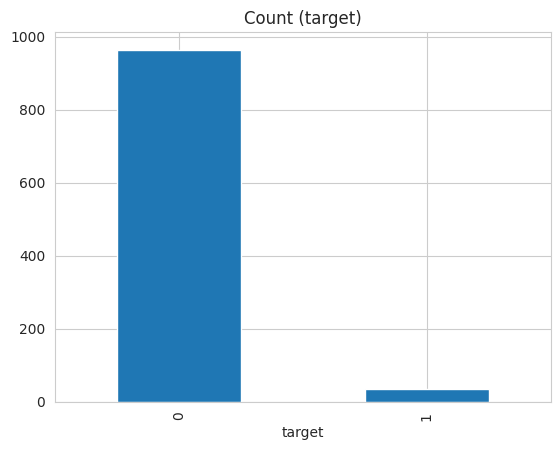

In [7]:
target_count = df.target.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0]/target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

We observe that the (training) target is highly unbalanced.
Some techniques will be performed in order to deal with this problem.

In [8]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

<h1> Under-sampling: Cluster Centroids <h1>

In [ ]:
sampler_cc = ClusterCentroids(sampling_strategy='auto')  # this algorithm is very slow for a big sample
X_train_cc, y_train_cc = sampler_cc.fit_resample(X_train, y_train)

In [ ]:
print(y_train_cc.query('target == 0').count())
print(y_train_cc.query('target == 1').count())

In [34]:
def plot_2d_space(X, y, label='Classes'):

    df = pd.concat([X, y], axis=1)

    var1= 'ps_car_13'
    var2= 'ps_car_15'

    plt.xlim([0.25, 3.0])
    plt.ylim([-0.1, 4.0])

    plt.scatter(df.query('target == 0').eval(var1), df.query('target == 0').eval(var2), c='tab:blue',   label='0', marker='o')
    plt.scatter(df.query('target == 1').eval(var1), df.query('target == 1').eval(var2), c='tab:orange', label='1', marker='s')

    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

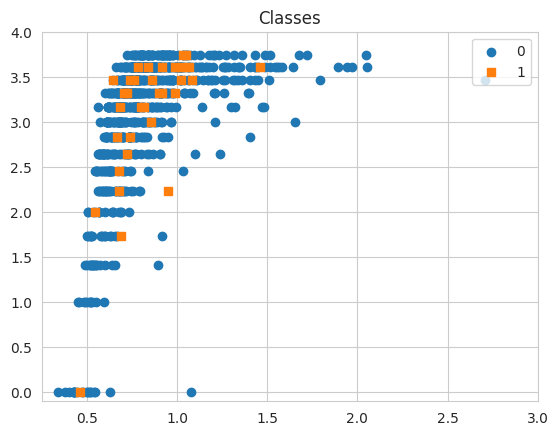

In [35]:
plot_2d_space(X=X_train, y=y_train)

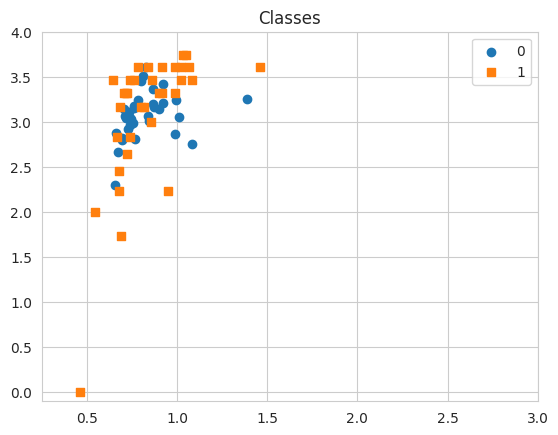

In [36]:
plot_2d_space(X=X_train_cc, y=y_train_cc)

<h1> Over - sampling: SMOTE <h1>

In [38]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

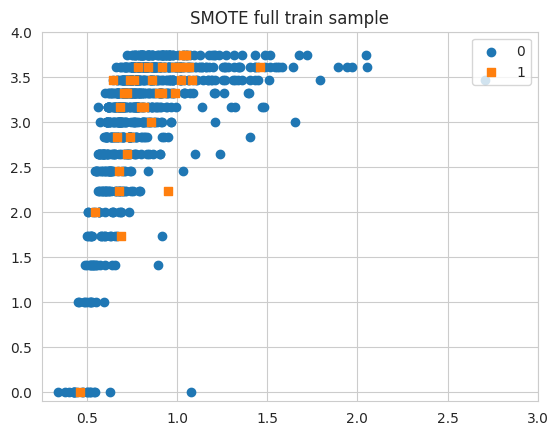

In [41]:
plot_2d_space(X_train, y_train, 'SMOTE full train sample')

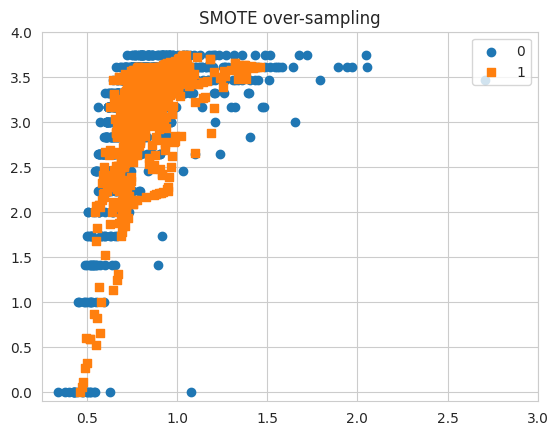

In [42]:
plot_2d_space(X_train_sm, y_train_sm, 'SMOTE over-sampling')